* sudo pip install graphviz
* http://graphviz.readthedocs.io/en/stable/manual.html
    * looks like the documentation is pretty solid. 
* http://www.graphviz.org/doc/info/attrs.html
*  https://github.com/xflr6/graphviz/issues/19
    * used for visualization " The library is exactly for creating (rendering, etc.) the DOT code lines for a graph, not as a generic library for representing graphs (like e.g. NetworkX)"

In [1]:
import graphviz
from ipywidgets import interact
from ipywidgets import widgets

def viz(p):
    d = graphviz.Digraph()
    d.attr('node', shape='circle')
    d.attr('edge', penwidth='7')
    d.edge('hello', 'world')
    d.attr('edge', penwidth='2')
    d.edge('goodbye', 'world')
    d.edge('hello', 'goodbye', _attributes={'penwidth' : str(p)})
    d.engine = 'circo'
    return d

p = widgets.IntSlider(min=0, max=10, step=1, value=3)
interact(viz, p=p)

<function __main__.viz>

In [2]:
#http://pygraphviz.github.io/documentation/latest/reference/agraph.html
    # http://www.graphviz.org/doc/info/attrs.html
# seems to be a bit faster than nxpd
import pygraphviz
from IPython.display import Image
from ipywidgets import interact
from ipywidgets import widgets

def pygraphDraw(p):
    G = pygraphviz.AGraph()#cycle_graph(4, create_using=nx.DiGraph())
    G.add_node('FSSN1', color='red', style='filled', fillcolor='pink', shape='circle')
    G.add_node('FSSN2')
    G.add_node('FSSN3')
    G.add_edge('FSSN1', 'FSSN2', penwidth=p)
    G.add_edge('FSSN1', 'FSSN3', penwidth=2)
    G.layout()
    G.draw('graph.png')
    return Image(G.draw(format='png', prog='circo'))
    

p = widgets.IntSlider(min=0, max=10, step=1, value=3)
interact(pygraphDraw, p=p)

<function __main__.pygraphDraw>

In [3]:
#https://github.com/chebee7i/nxpd
#https://stackoverflow.com/questions/32375679/ipython-notebook-plotting-transition-diagrams

import networkx as nx
import nxpd
from ipywidgets import interact
from ipywidgets import widgets



def drawNXPD(p):
    G = nx.Graph()#cycle_graph(4, create_using=nx.DiGraph())
    G.add_node('FSSN1', color='red', style='filled', fillcolor='pink', shape='circle')
    G.add_node('FSSN2')
    G.add_node('FSSN3')
    G.add_edge('FSSN1', 'FSSN2', penwidth=p)
    G.add_edge('FSSN1', 'FSSN3', penwidth=2)
    print(type(nxpd.draw(G, show='ipynb')))
    return nxpd.draw(G, show='ipynb')
    

p = widgets.IntSlider(min=0, max=10, step=1, value=3)

interact(drawNXPD, p=p)

<function __main__.drawNXPD>

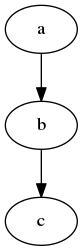

In [4]:
#https://stackoverflow.com/questions/32375679/ipython-notebook-plotting-transition-diagrams
import pygraphviz as pgv
from IPython.display import Image

def draw(dot):
    return Image(pgv.AGraph(dot).draw(format='png', prog='dot'))

g1 = """digraph top {
   a -> b -> c;
}"""
draw(g1)

In [5]:
import matplotlib.pyplot as plt
from ipywidgets import interact
from ipywidgets import widgets

def genGraph(p):
    
    G = nx.complete_graph(p)
    #G1 = placeStations(G)
    nx.draw(G)
    plt.show()

p = widgets.IntSlider(min=0, max=10, step=1, value=3)

interact(genGraph, p=p)

<function __main__.genGraph>

In [6]:
#cytoscape
#https://www.slideshare.net/keiono/introduction-to-biological-network-analysis-and-visualization-with-cytoscape-part-2?next_slideshow=1
# https://github.com/idekerlab/py2cytoscape
# http://www.cytoscape.org/what_is_cytoscape.html


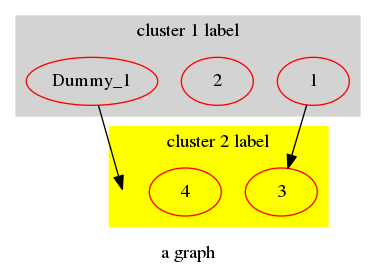

In [7]:
import pygraphviz as p

G = p.AGraph(directed=True)


G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node('Dummy_1')
G.add_node('Dummy_2', shape='point', style='invis')

G.add_edge(1,3)
G.add_edge('Dummy_1', 'Dummy_2')

G.node_attr['color']='red'
G.node_attr['style']='filled'
G.graph_attr['label']='a graph'

G1 = G.subgraph(nbunch=[1,2, 'Dummy_1'],
                name="cluster1",
                style='filled',
                color='lightgrey',
                label='cluster 1 label')

# this doesn't work correctly
#G1.node_attr['style']='filled'
#G1.node_attr['color']='blue'

attributes={}
attributes.update(style='filled',
                  color='yellow',
                  label='cluster 2 label')

G2 = G.subgraph(nbunch=[3,4, 'Dummy_2'],name="cluster2",**attributes)
#G.add_edge(G1, G2)

Image(G.draw(format='png', prog='dot'))

In [13]:
import pygraphviz as p
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
import nxpd
#from networkx.drawing import draw_graphviz

K = nx.complete_graph(5)
K.add_nodes_from(['1app1', '1app2', '2app1', '3app1', '4app1', '5app1'])
K.add_edge('1app1', 1)
K.add_edge('1app2', 1)
K.add_edge('2app1', 2)
K.add_edge('3app1', 3)
K.add_edge('4app1', 4)
K.add_edge('5app1', 0)


pos  = graphviz_layout(K)
#nx.set_node_attributes(K, 'pos', pos)
display(K.nodes(data=True))
AK = to_agraph(K)
AK.add_node("colored", color='brown')
AK.layout()
fssn1 = AK.get_node('1')


display(fssn1.attr.get('pos'))
display(fssn1.attr.keys())
#fssn1.attr['name']='FSSN1'
#display(fssn1.attr.keys())
#fssn1.attr['pos']= '1,1'
#display(fssn1.attr.get('pos'))

#nxpd.draw(K)
FSSN1 = AK.subgraph(nbunch=[1,'1app1', '1app2'],
                name="cluster1",
                style='filled',
                color='lightgrey',
                label='FSSN1')

FSSN2 = AK.subgraph(nbunch=[2,'2app1'],
                name="cluster2",
                style='filled',
                color='lightgrey',
                label='FSSN2')
FSSN3 = AK.subgraph(nbunch=[3,'3app1'],
                name="cluster3",
                style='filled',
                color='lightgrey',
                label='FSSN3')
FSSN4 = AK.subgraph(nbunch=[4,'4app1'],
                name="cluster4",
                style='filled',
                color='lightgrey',
                label='FSSN4')
FSSN5 = AK.subgraph(nbunch=[0,'5app1'],
                name="cluster5",
                style='filled',
                color='lightgrey',
                label='FSSN5')
Image(AK.draw(format='png', prog='fdp'))



[(0, {}),
 (1, {}),
 (2, {}),
 (3, {}),
 (4, {}),
 ('3app1', {}),
 ('1app2', {}),
 ('5app1', {}),
 ('2app1', {}),
 ('4app1', {}),
 ('1app1', {})]

'-0.92114,-44.512'

['height', 'pos', 'width']

TypeError: cannot use a string pattern on a bytes-like object

In [9]:
import pygraphviz
from IPython.display import Image
from ipywidgets import interact
from ipywidgets import widgets

G = pygraphviz.AGraph(root=None)
addStations(G)
G.layout()
G.nodes()

fssn1 = G.get_node('FSSN1')
display(fssn1.attr.get('pos'))
display(fssn1.attr.keys())
fssn1.attr['name']='FSSN1'
display(fssn1.attr.keys())

NameError: name 'addStations' is not defined